In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('raw_data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.sample(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
747618,0,NaN,0.200877,NaN,79,30,0.011494,-0.734227,AB,3340.0,4752.828939,3782.297436,4273.920271,13,8,CA,213,NaN,BE,1,1,1,NaN,200.0,NaN,INTERNET,5.841799,NaN,1,1,0,5
662400,0,0.7,0.189497,-1.0,203,40,0.003022,-0.943833,AB,NaN,5034.266536,4599.993221,4402.531625,1023,3,CA,162,0.0,BA,1,1,15,1.0,500.0,NaN,INTERNET,1.932750,NaN,0,1,0,4
813249,0,0.9,0.221151,-1.0,174,40,0.000083,-1.000667,AC,714.0,4494.443403,5305.572101,4300.647281,1,9,NaN,194,1.0,BB,1,1,-1,0.0,1500.0,NaN,INTERNET,17.401041,other,0,1,0,6
122505,0,0.8,0.997401,NaN,258,20,0.004343,NaN,AA,NaN,7810.852796,6318.917985,6765.473117,2,16,NaN,32,0.0,BC,1,1,21,0.0,200.0,0.0,INTERNET,2.505564,other,0,1,0,0
88192,0,0.2,0.885909,25.0,31,20,0.010533,NaN,AB,1201.0,4509.520247,3719.421213,6796.986463,7,5,CA,86,0.0,BC,0,1,3,0.0,200.0,0.0,INTERNET,4.207061,NaN,1,1,0,0


In [49]:
df.shape

(1000000, 32)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            845429 non-null   float64
 2   name_email_similarity             878761 non-null   float64
 3   prev_address_months_count         537360 non-null   float64
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            859130 non-null   float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      676304 non-null   float64
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [51]:
df['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [52]:
missing_percent = df.isnull().mean() * 100

missing_data = missing_percent[missing_percent > 0]
missing_data = missing_data.sort_values(ascending=False)

In [53]:
missing_data

prev_address_months_count    46.2640
zip_count_4w                 32.3696
employment_status            30.0112
device_os                    29.3869
foreign_request              21.8423
email_is_free                17.5733
income                       15.4571
intended_balcon_amount       14.0870
name_email_similarity        12.1239
has_other_cards              10.9091
dtype: float64

In [54]:
obj_cols = [i for i in df.columns if df[i].dtypes == 'object']
int_cols = [i for i in df.columns if df[i].dtypes != 'object' and i!='fraud_bool']

In [55]:
int_cols

['income',
 'name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'proposed_credit_limit',
 'foreign_request',
 'session_length_in_minutes',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'device_fraud_count',
 'month']

In [56]:
obj_cols

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

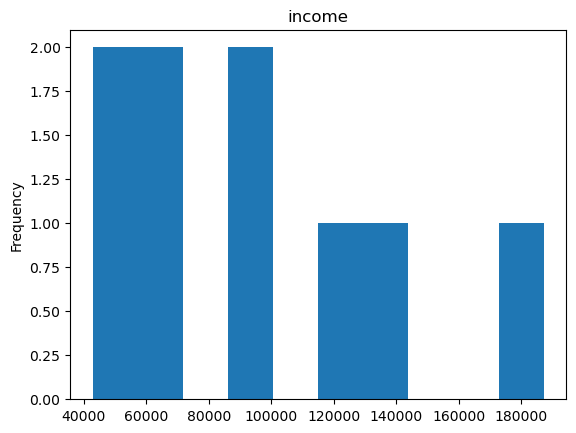

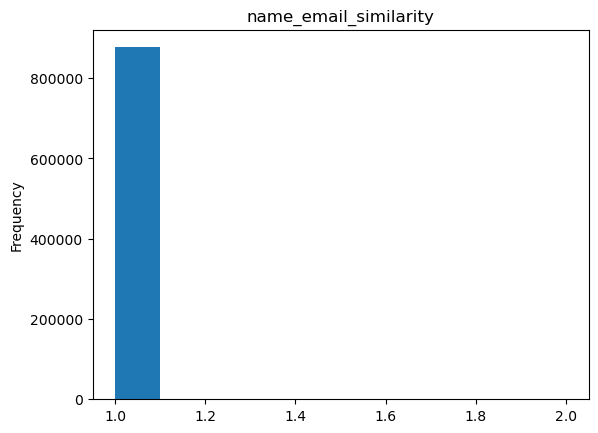

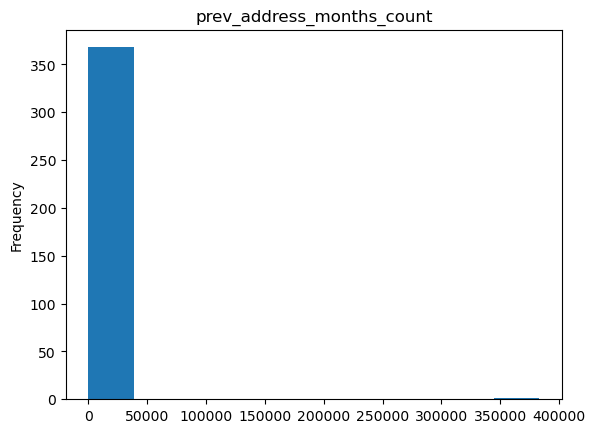

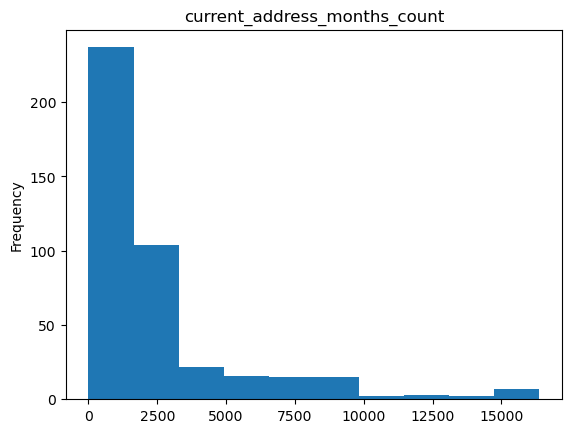

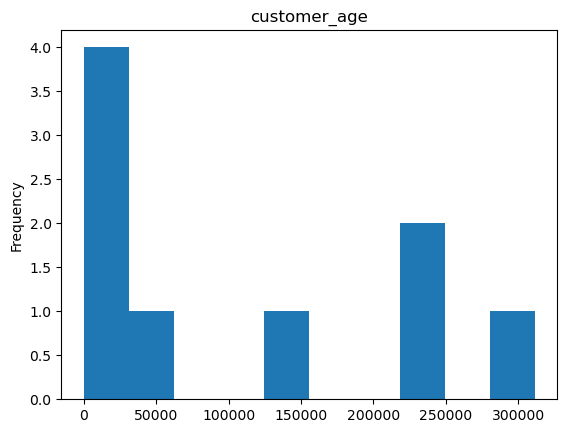

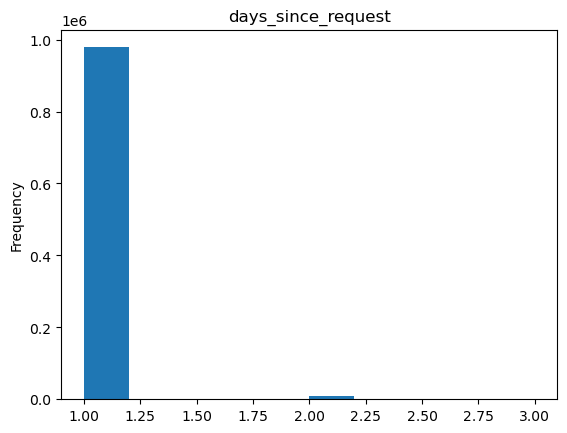

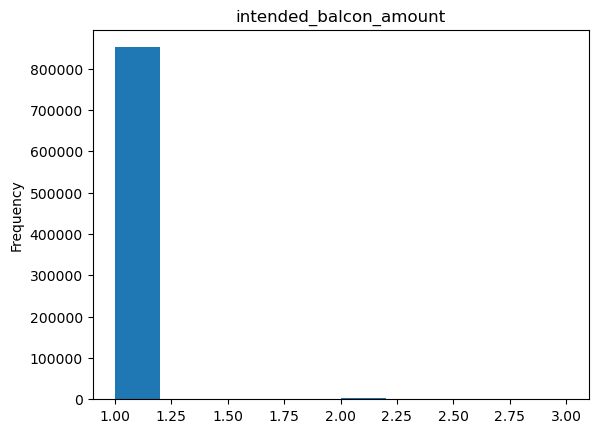

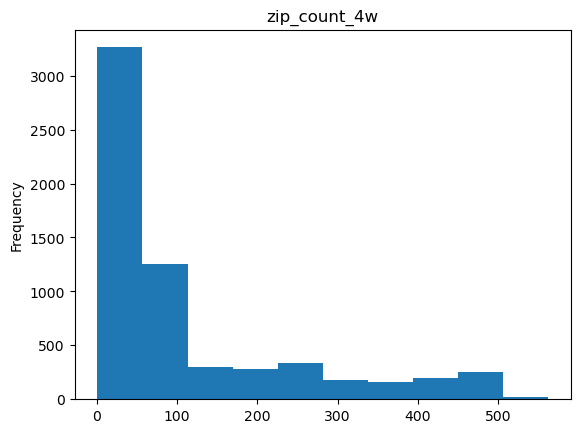

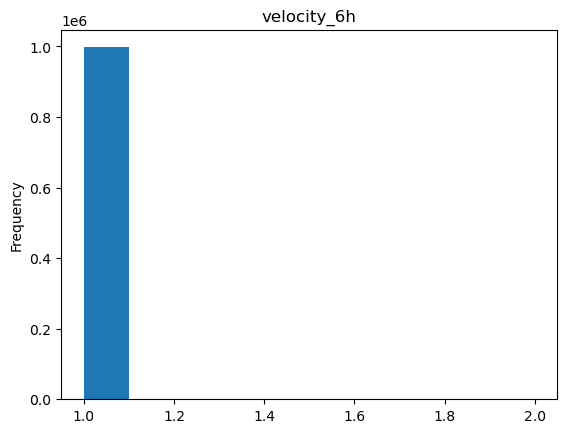

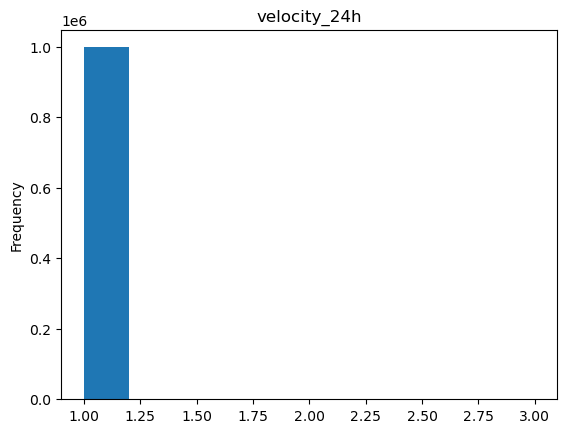

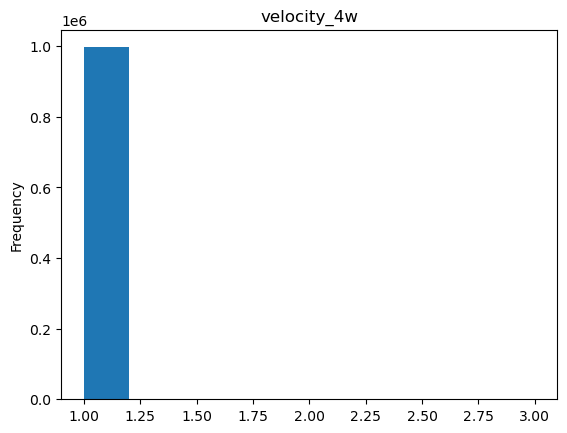

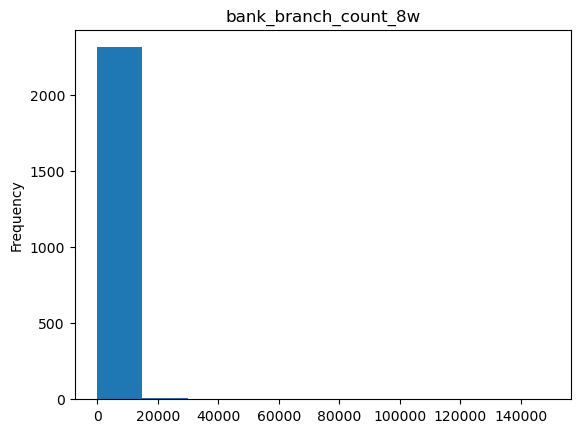

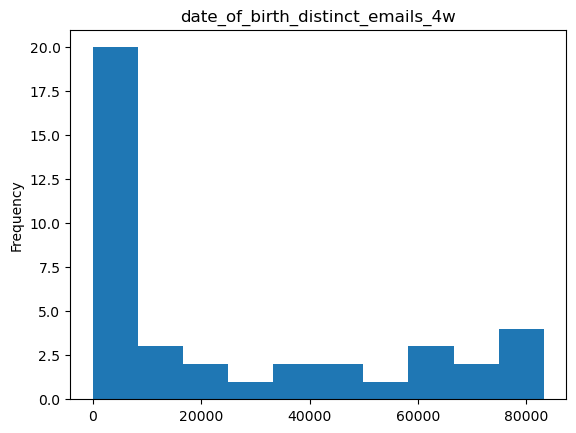

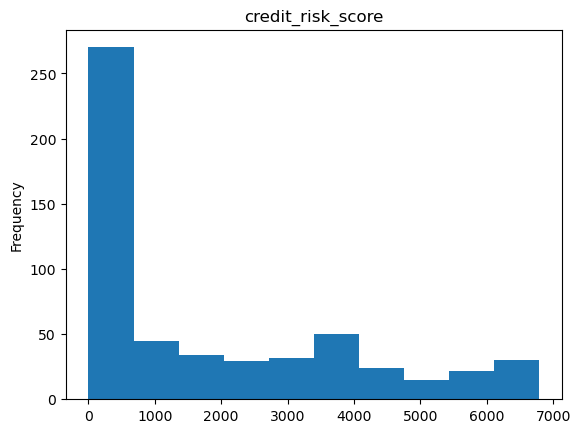

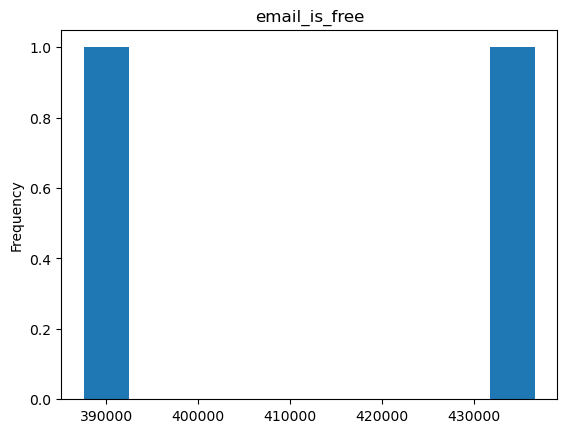

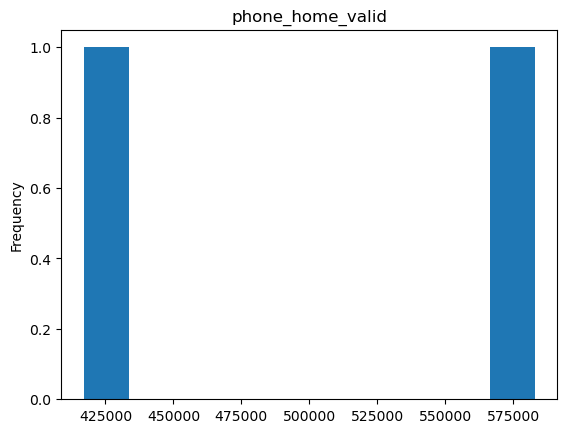

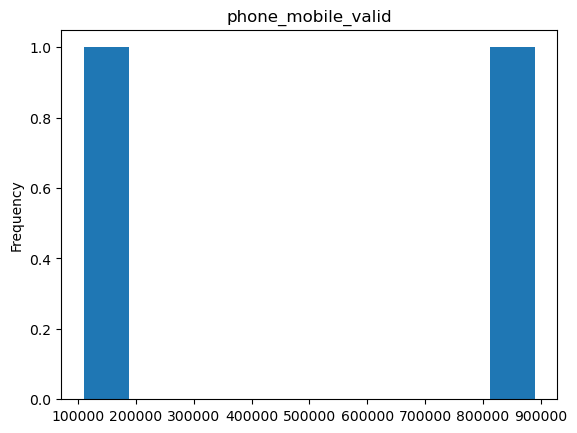

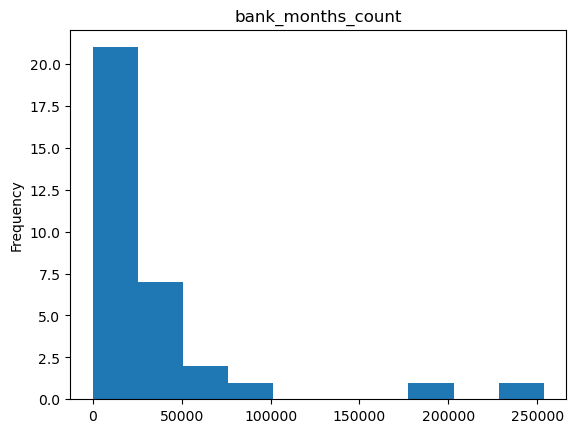

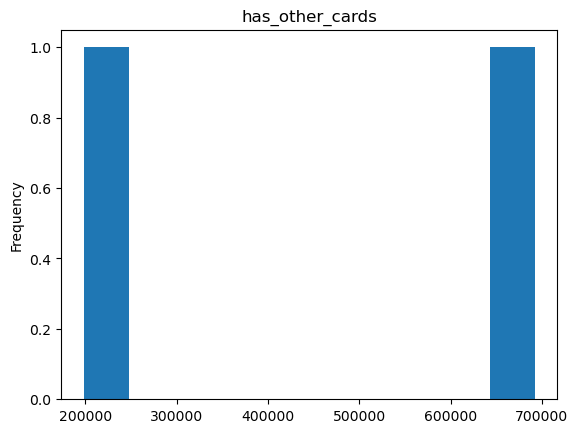

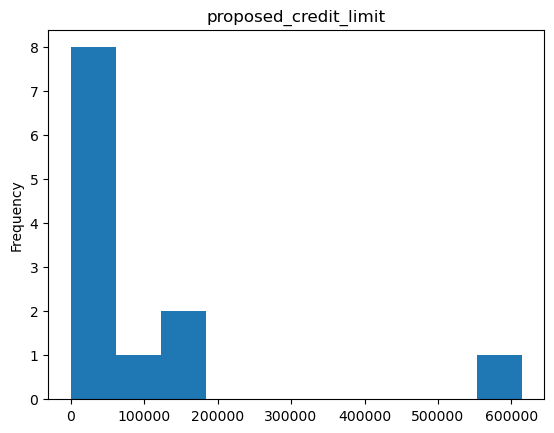

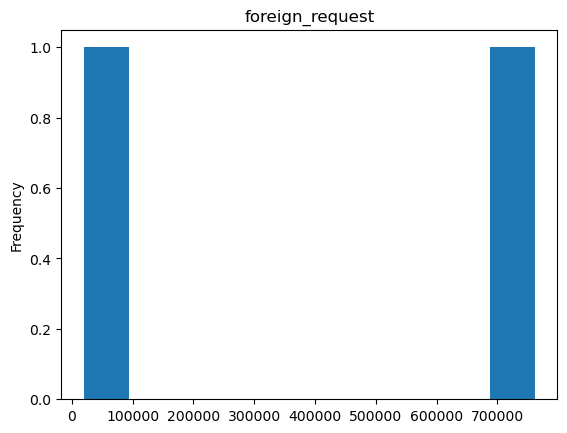

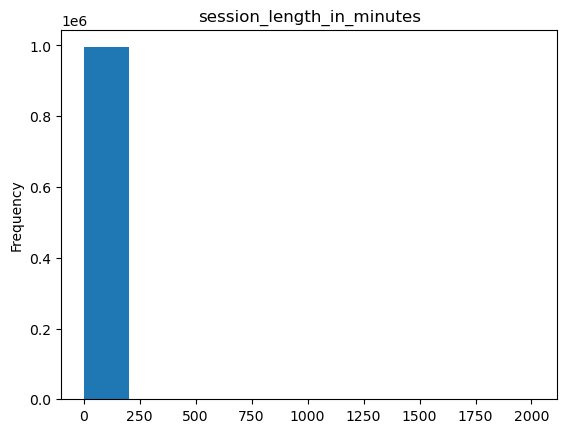

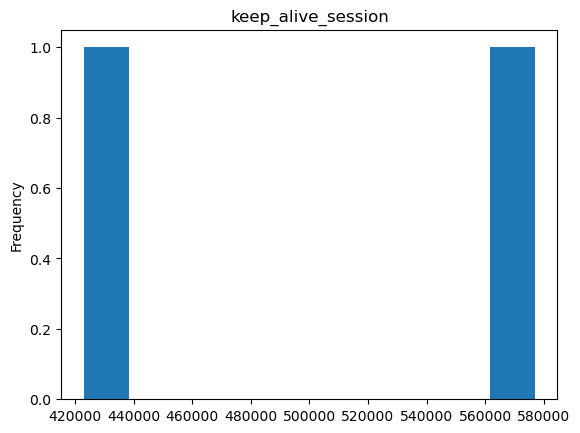

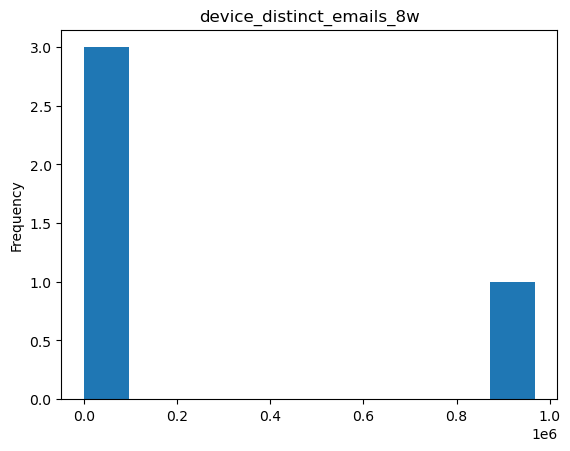

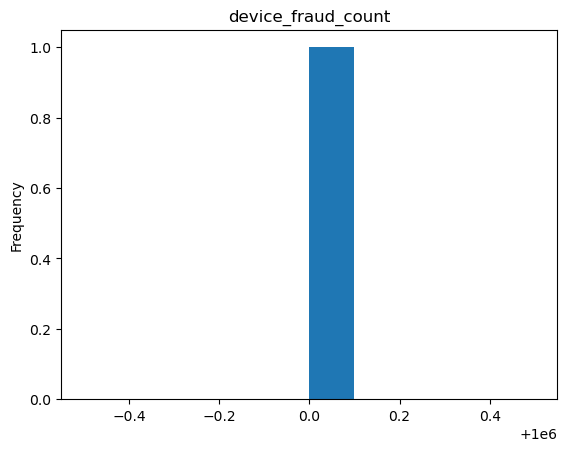

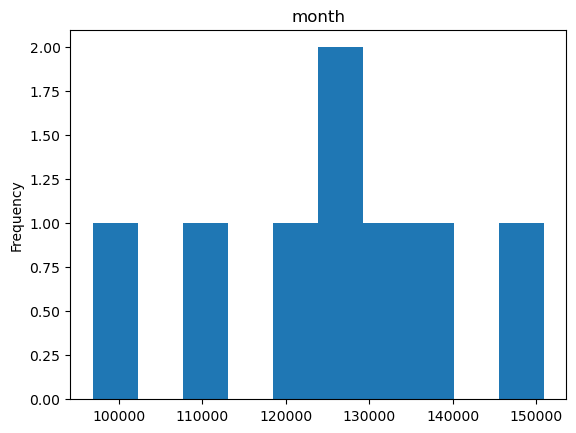

In [57]:
import matplotlib.pyplot as plt
for i in int_cols:
    plt.title(i)
    df[i].value_counts().plot(kind='hist')
    plt.show()

In [58]:
## Missing values in int

missing_percent_int = df[int_cols].isnull().mean() * 100

missing_data_int = missing_percent_int[missing_percent_int > 0]
missing_data_int = missing_data_int.sort_values(ascending=False)

In [59]:
missing_data_int

prev_address_months_count    46.2640
zip_count_4w                 32.3696
foreign_request              21.8423
email_is_free                17.5733
income                       15.4571
intended_balcon_amount       14.0870
name_email_similarity        12.1239
has_other_cards              10.9091
dtype: float64

### Missing value imputation

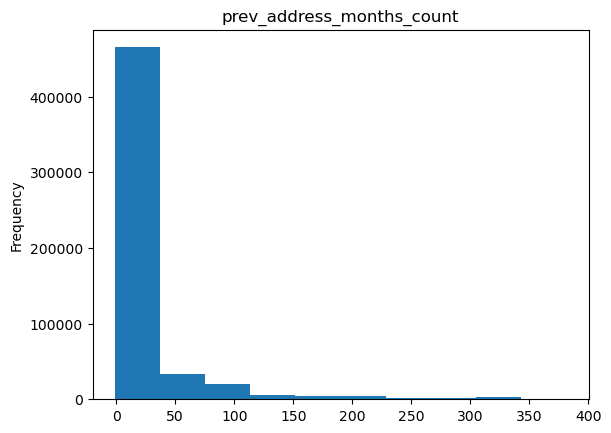

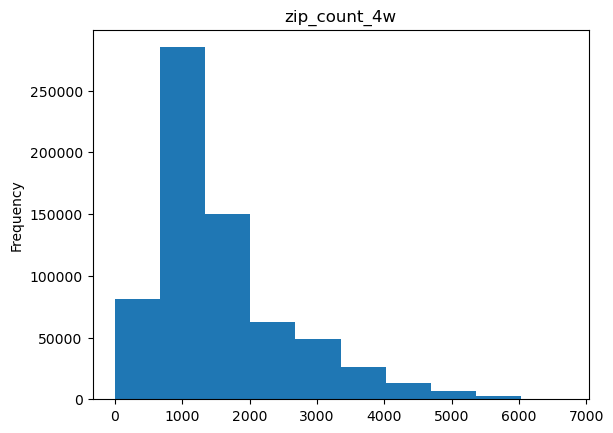

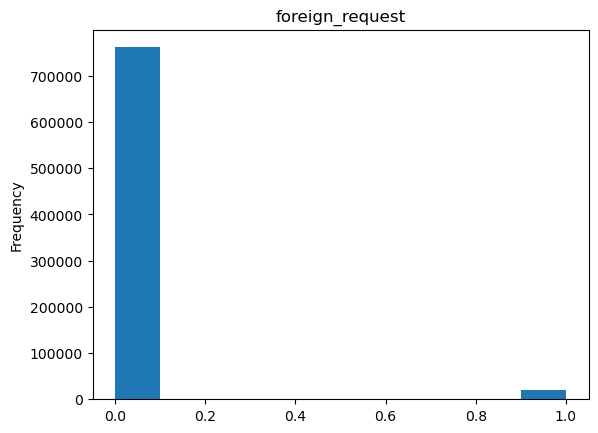

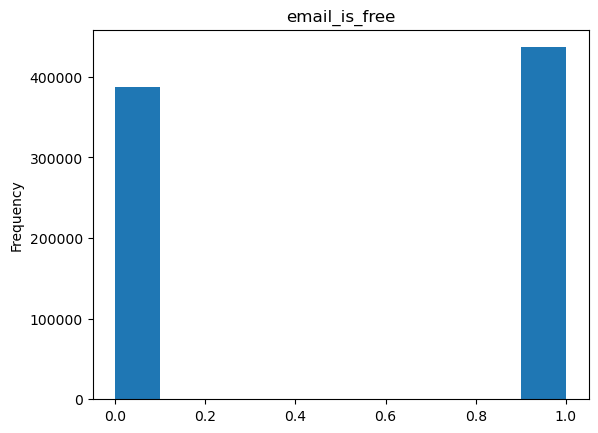

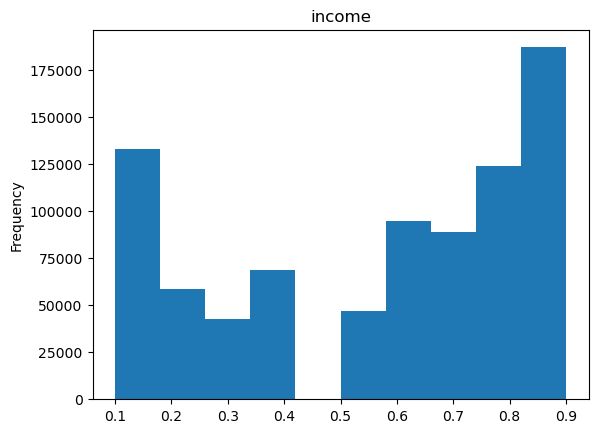

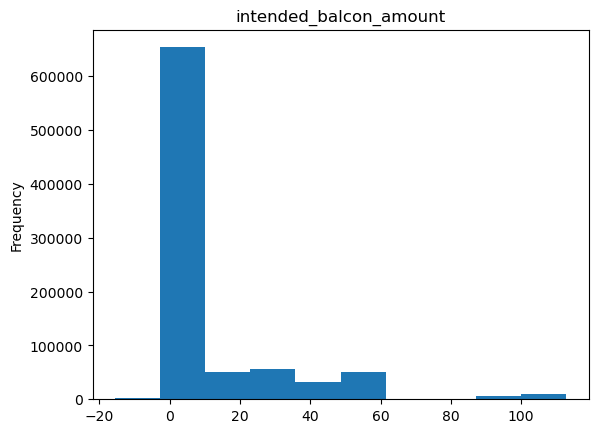

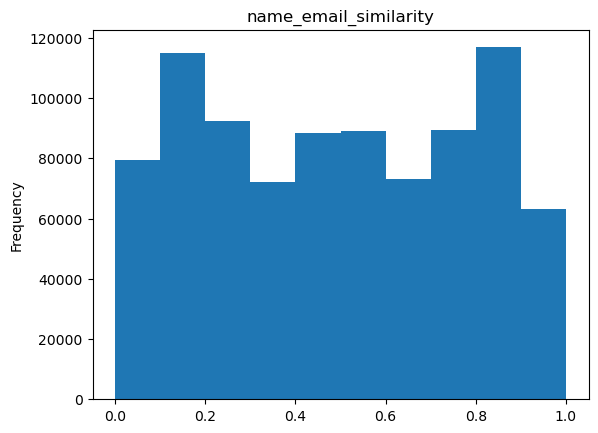

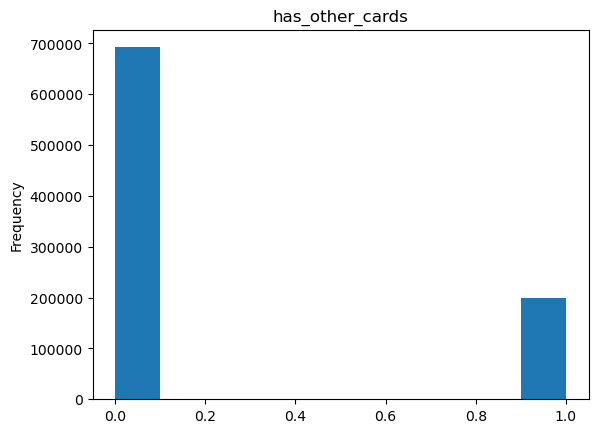

In [60]:
import matplotlib.pyplot as plt

for i in missing_data_int.index:
    plt.title(i)
    df[i].plot(kind='hist')
    plt.show()

* Here are the imputation strategies for the above columns:
  1. prev_address_months_count, zip_count_4w, intended_balcon_amount - Median
  2. foreign_request, email_is_free, has_other_cards - Mode
  3. income, name_email_similarity - Mean

In [61]:
## Missing values in categorical

missing_percent_obj = df[obj_cols].isnull().mean() * 100

missing_data_obj = missing_percent_obj[missing_percent_obj > 0]
missing_data_obj = missing_percent_obj.sort_values(ascending=False)

In [62]:
missing_data_obj

employment_status    30.0112
device_os            29.3869
payment_type          0.0000
housing_status        0.0000
source                0.0000
dtype: float64

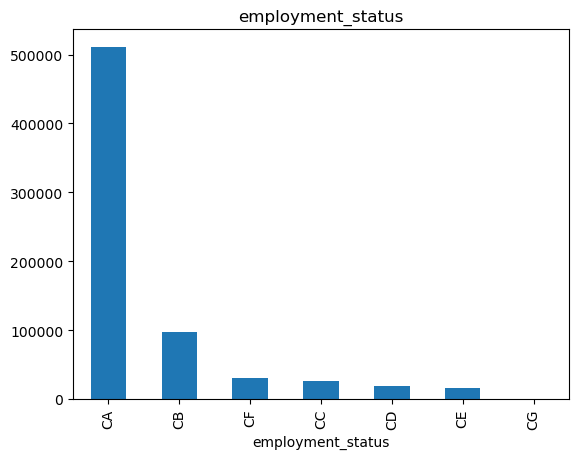

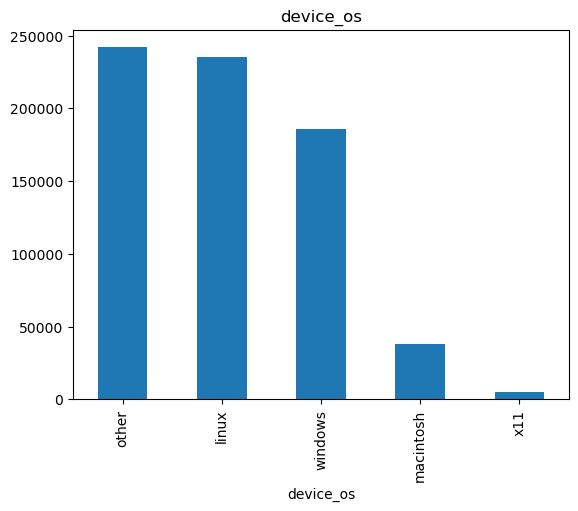

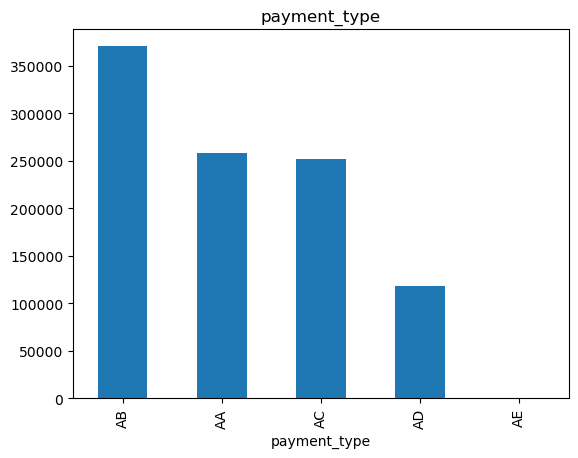

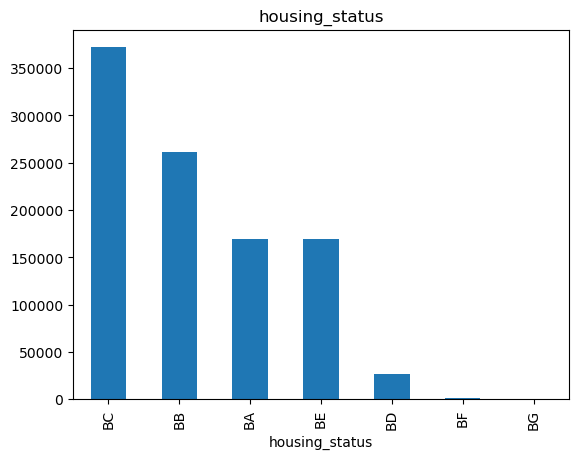

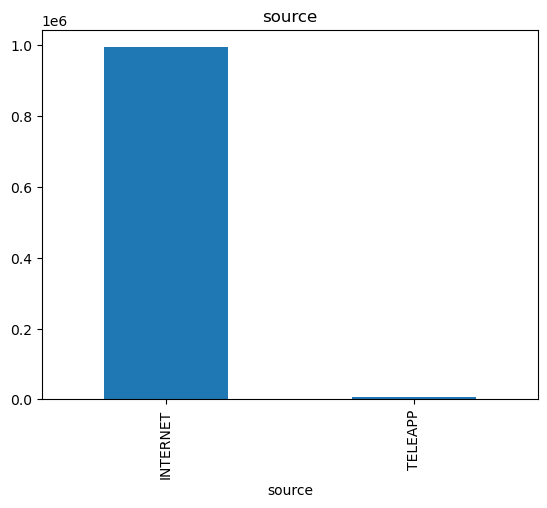

In [63]:
for i in missing_data_obj.index:
    plt.title(i)
    df[i].value_counts().plot(kind='bar')
    plt.show()

* Here are the imputation strategies for the above columns:
  1. employment_status - Mode
  2. device_os - random

### Feature encoding

In [64]:
df[obj_cols].head()

,payment_type,employment_status,housing_status,source,device_os
0,AA,CB,BC,INTERNET,linux
1,AD,CA,BC,INTERNET,other
2,AB,CA,BC,INTERNET,NaN
3,AB,CA,BC,INTERNET,linux
4,AA,CA,BC,INTERNET,NaN


In [65]:
for i in obj_cols:
    print(df[i].value_counts())

payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64
employment_status
CA    510887
CB     96867
CF     30884
CC     26431
CD     18626
CE     15875
CG       318
Name: count, dtype: int64
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
source
INTERNET    992952
TELEAPP       7048
Name: count, dtype: int64
device_os
other        241952
linux        235211
windows      185910
macintosh     38013
x11            5045
Name: count, dtype: int64


* Here are the encoding strategies for the above columns:
  1. payment_type, employment_status, housing_status - frequency encoding
  2. source, devie_os - ohe

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from category_encoders.count import CountEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

In [68]:
def random_sample_imputer(series):
    non_null_values = series.dropna()
    return series.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)

class RandomSampleImputerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(random_sample_imputer)

    def get_feature_names_out(self, input_features=None):
        return input_features

random_sample_imputer_transformer = RandomSampleImputerTransformer()

In [69]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2,stratify=df['fraud_bool'])
y_train = df_train[['fraud_bool']]
X_train = df_train.drop(['fraud_bool'],axis=1)

y_test = df_test[['fraud_bool']]
X_test = df_test.drop(['fraud_bool'],axis=1)

In [70]:
for index, column in enumerate(X_train.columns):
    print(f"Column {index}: {column}")

Column 0: income
Column 1: name_email_similarity
Column 2: prev_address_months_count
Column 3: current_address_months_count
Column 4: customer_age
Column 5: days_since_request
Column 6: intended_balcon_amount
Column 7: payment_type
Column 8: zip_count_4w
Column 9: velocity_6h
Column 10: velocity_24h
Column 11: velocity_4w
Column 12: bank_branch_count_8w
Column 13: date_of_birth_distinct_emails_4w
Column 14: employment_status
Column 15: credit_risk_score
Column 16: email_is_free
Column 17: housing_status
Column 18: phone_home_valid
Column 19: phone_mobile_valid
Column 20: bank_months_count
Column 21: has_other_cards
Column 22: proposed_credit_limit
Column 23: foreign_request
Column 24: source
Column 25: session_length_in_minutes
Column 26: device_os
Column 27: keep_alive_session
Column 28: device_distinct_emails_8w
Column 29: device_fraud_count
Column 30: month


In [71]:
preprocessor1 =ColumnTransformer([
    ('trf1',SimpleImputer(strategy='mean'),[0, 1]),
    ('trf2',SimpleImputer(strategy='median'),[2, 8, 6]),
    ('trf3',SimpleImputer(strategy='most_frequent'),[14,23, 16, 21]),
    ('trf4',random_sample_imputer_transformer,[26])
], remainder = 'passthrough',n_jobs=-1)

In [72]:
X_train_transformed = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=preprocessor1.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor1.transform(X_test),columns=preprocessor1.get_feature_names_out())

In [73]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 31 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   trf1__income                                 800000 non-null  object
 1   trf1__name_email_similarity                  800000 non-null  object
 2   trf2__prev_address_months_count              800000 non-null  object
 3   trf2__zip_count_4w                           800000 non-null  object
 4   trf2__intended_balcon_amount                 800000 non-null  object
 5   trf3__employment_status                      800000 non-null  object
 6   trf3__foreign_request                        800000 non-null  object
 7   trf3__email_is_free                          800000 non-null  object
 8   trf3__has_other_cards                        800000 non-null  object
 9   trf4__device_os                              800000 non-null  object
 

In [74]:
preprocessor2 = ColumnTransformer([
    ('trf1',OneHotEncoder(sparse=False, drop='first'),[25]),
    ('trf2',CountEncoder(min_group_size=10000, min_group_name='rare'),[13, 5, 20,9])
], remainder = 'passthrough', n_jobs=-1)

In [75]:
X_train_transformed = pd.DataFrame(preprocessor2.fit_transform(X_train_transformed),columns=preprocessor2.get_feature_names_out())

In [76]:
X_test_transformed = pd.DataFrame(preprocessor2.transform(X_test_transformed),columns=preprocessor2.get_feature_names_out())

In [77]:
preprocessor3 = ColumnTransformer([
    ('trf1',StandardScaler(),[i for i in range(len(X_train_transformed.columns))])
], remainder = 'passthrough', n_jobs=-1)

In [78]:
X_train_transformed = pd.DataFrame(preprocessor3.fit_transform(X_train_transformed),columns=preprocessor3.get_feature_names_out())

In [79]:
X_test_transformed = pd.DataFrame(preprocessor3.transform(X_test_transformed),columns=preprocessor3.get_feature_names_out())

In [80]:
## training col names
extracted_names = [col.split('__')[-1] for col in X_train_transformed.columns]
X_train_transformed.columns = extracted_names


In [81]:
extracted_names = [col.split('__')[-1] for col in X_test_transformed.columns]
X_test_transformed.columns = extracted_names

In [82]:
X_train_transformed.head()

,source_TELEAPP,payment_type,employment_status,housing_status,device_os,income,name_email_similarity,prev_address_months_count,zip_count_4w,intended_balcon_amount,foreign_request,email_is_free,has_other_cards,current_address_months_count,customer_age,days_since_request,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,bank_months_count,proposed_credit_limit,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,-0.084442,-0.294071,0.482195,-1.006850,0.574883,0.513317,-1.594756,-0.284339,-0.249853,0.795382,-0.141861,0.795255,2.009140,1.340878,2.188361,0.082297,-0.718349,0.319773,-0.690529,2.767370,-0.894658,-1.047897,1.182417,0.352965,-0.646626,-0.648221,1.286689,-1.167675,-0.101941,0.0,1.226295
1,-0.084442,1.106285,0.482195,-0.041431,-0.513891,0.887978,-1.268500,-0.284339,-0.249853,-0.434318,-0.141861,0.795255,-0.497726,-0.413472,-1.137697,-0.188637,0.243395,0.345803,1.215157,4.237271,0.098418,0.286802,-0.845725,0.352965,1.581283,-0.648221,-0.084872,0.856402,-0.101941,0.0,-1.035800
2,-0.084442,-0.294071,-1.947466,1.133343,-0.513891,0.138657,-1.374732,-0.284339,-0.771044,-0.428317,-0.141861,0.795255,-0.497726,1.193739,1.356846,-0.189169,0.860289,-0.751215,-0.607475,-0.303091,-1.689119,2.008994,1.182417,0.352965,1.416253,2.017559,0.726533,-1.167675,-0.101941,0.0,1.226295
3,-0.084442,1.106285,0.482195,-1.006850,0.574883,0.138657,1.576110,-0.284339,-0.605643,-0.397636,-0.141861,-1.257459,2.009140,1.544609,0.525332,-0.185229,-0.148030,-0.110138,0.360738,-0.379308,-0.298812,0.832163,1.182417,0.352965,-0.811656,2.017559,-0.618113,-1.167675,-0.101941,0.0,0.321457
4,-0.084442,1.106285,0.482195,-1.000019,0.454747,1.262638,-1.148869,-0.284339,-0.668710,-0.446994,-0.141861,-1.257459,-0.497726,-0.277651,0.525332,-0.184817,-1.536051,-1.318767,-0.517578,-0.374953,-0.894658,0.516428,1.182417,-2.833143,-0.811656,0.992259,-0.288238,-1.167675,-0.101941,0.0,1.226295


In [83]:
X_train_transformed.shape

(800000, 31)

In [84]:
X_test_transformed.shape

(200000, 31)

In [93]:
X_test_transformed.head()

,source_TELEAPP,payment_type,employment_status,housing_status,device_os,income,name_email_similarity,prev_address_months_count,zip_count_4w,intended_balcon_amount,foreign_request,email_is_free,has_other_cards,current_address_months_count,customer_age,days_since_request,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,phone_home_valid,phone_mobile_valid,bank_months_count,proposed_credit_limit,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,-0.084442,-0.294071,0.482195,1.133343,0.574883,0.513317,0.807211,-0.284339,-0.571135,2.343746,-0.141861,0.795255,-0.497726,-0.900163,-0.306182,1.198097,-0.331031,1.643604,1.690159,-0.320512,2.481801,-1.507148,1.182417,0.352965,1.251223,0.992259,-0.357851,0.856402,-0.101941,0.0,0.773876
1,-0.084442,-0.294071,0.482195,-2.509949,0.574883,-0.610665,1.849872,-0.284339,0.163054,4.634442,-0.141861,-1.257459,-0.497726,-0.492701,-1.137697,-0.185510,0.785339,1.859977,1.993719,-0.379308,0.694264,-1.435390,-0.845725,0.352965,1.168707,-0.648221,1.246067,0.856402,-0.101941,0.0,-1.488219
2,-0.084442,1.106285,0.482195,-1.000019,0.454747,0.513317,-1.054653,-0.284339,-0.004726,-0.451423,-0.141861,-1.257459,-0.497726,0.605183,0.525332,-0.189820,-0.481021,-0.583386,-1.483608,-0.377130,0.297033,-0.330317,1.182417,-2.833143,1.663798,-0.648221,-0.412854,0.856402,-0.101941,0.0,1.678714
3,-0.084442,1.106285,0.482195,1.133343,0.574883,0.887978,-0.937473,-0.284339,-0.249853,-0.425947,-0.141861,-1.257459,-0.497726,-0.504019,-0.306182,-0.185739,-1.035130,-1.042052,-1.999869,-0.390196,0.297033,-0.445129,1.182417,0.352965,-0.811656,-0.648221,-0.251702,0.856402,-0.101941,0.0,1.678714
4,-0.084442,-0.294071,0.482195,-1.000019,0.454747,-1.359986,-0.205577,-0.284339,2.020541,0.607317,-0.141861,-1.257459,2.009140,1.057918,-0.306182,-0.185317,-0.491144,1.103822,-0.815251,0.463435,-0.100197,1.061788,1.182417,0.352965,1.663798,-0.033041,0.120670,-1.167675,-0.101941,0.0,0.321457


In [85]:
y_train.value_counts()

fraud_bool
0             791177
1               8823
Name: count, dtype: int64

In [86]:
y_test.value_counts()

fraud_bool
0             197794
1               2206
Name: count, dtype: int64

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
models = {
                "Random Forest": RandomForestClassifier(n_jobs = -1,class_weight='balanced'),
                "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
                "Logistic": LogisticRegression(n_jobs = -1,class_weight='balanced')
            }

In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
from sklearn.metrics import recall_score, classification_report

In [91]:
## Dagshub setup
import dagshub
import mlflow
dagshub.init(repo_owner='SrijanDeo-DA-DS', repo_name='bank-fraud-detection-with-deployment', mlflow=True)
mlflow.set_tracking_uri('https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow')

mlflow.set_experiment("All models Baseline with fe+fs and cv")

Initialized MLflow to track repo "SrijanDeo-DA-DS/bank-fraud-detection-with-deployment"

Repository SrijanDeo-DA-DS/bank-fraud-detection-with-deployment initialized!

<Experiment: artifact_location='mlflow-artifacts:/0202247b6ca64489a22b71b3bac1b9d5', creation_time=1730302752890, experiment_id='5', last_update_time=1730302752890, lifecycle_stage='active', name='All models Baseline with fe+fs and cv', tags={}>

In [94]:
results_training = []
results_test = []

with mlflow.start_run(run_name="All experiments with fe and cv") as parent_run:
    for name, model in models.items():

        with mlflow.start_run(run_name=f"{name}", nested=True) as child_run:

            ## log preprocessing paramters
            mlflow.log_param("test_size",0.2)
    
            ## log model
            mlflow.log_param("model", name)
    
            if name == "RandomForestClassifier":
                mlflow.log_param("class_weight", model.class_weight)
            elif name == "DecisionTreeClassifier":
                mlflow.log_param("class_weight", model.class_weight)
            elif name == "LogisticRegression":
                mlflow.log_param("class_weight", model.class_weight)

            cv_scores = cross_val_score(model, X_train_transformed, y_train, scoring='recall_macro', cv=skf, n_jobs=-1)
            cv_mean_recall = cv_scores.mean()
            print("Avg cv recall score: ", cv_mean_recall)
            mlflow.log_metric("cv_recall_macro", cv_mean_recall)

            model.fit(X_train_transformed, y_train)
            y_pred_test = model.predict(X_test_transformed)
        
            ##for underfitting
            y_pred_train = model.predict(X_train_transformed)
        
            # recall score
            recall_test = recall_score(y_test, y_pred_test)
            recall_train = recall_score(y_train, y_pred_train)
        
            # logging recall (can log other metrics too)
            mlflow.log_metric("recall-train-data", recall_train)
            mlflow.log_metric("recall-test-data", recall_test)
            
            results_training.append({"Model": name, "Recall": recall_train})
            results_test.append({"Model": name, "Recall": recall_test})
        
            # classification report
            print("Train data classification report for- ",name,classification_report(y_train, y_pred_train))
            print("Test data classification report - ",name, classification_report(y_test, y_pred_test))
        
            # log model
            mlflow.sklearn.log_model(model, "model")
        
            # log notebook
            import os
            notebook_path = "exp4_fe+fs_all_model.ipynb"
            os.system(f"Jupyer nbconvert --to notebook --execute --inplace {notebook_path}")
            mlflow.log_artifact(notebook_path)

    
results_df_test = pd.DataFrame(results_test)

results_df_training = pd.DataFrame(results_training)

Avg cv recall score:  0.5002795585435614
Train data classification report for-  Random Forest               precision    recall  f1-score   support

           0       1.00      1.00      1.00    791177
           1       1.00      1.00      1.00      8823

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data classification report -  Random Forest               precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       1.00      0.00      0.00      2206

    accuracy                           0.99    200000
   macro avg       0.99      0.50      0.50    200000
weighted avg       0.99      0.99      0.98    200000



2024/10/30 13:06:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/30 13:09:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5/runs/5503882008534bf5b95df745238e580c.
2024/10/30 13:09:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5.


Avg cv recall score:  0.5264766605516484
Train data classification report for-  Decision Tree               precision    recall  f1-score   support

           0       1.00      1.00      1.00    791177
           1       1.00      1.00      1.00      8823

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000

Test data classification report -  Decision Tree               precision    recall  f1-score   support

           0       0.99      0.99      0.99    197794
           1       0.06      0.06      0.06      2206

    accuracy                           0.98    200000
   macro avg       0.53      0.53      0.53    200000
weighted avg       0.98      0.98      0.98    200000



2024/10/30 13:11:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/30 13:11:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5/runs/18d288a7f4044c1c88ee20e76b684181.
2024/10/30 13:11:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5.


Avg cv recall score:  0.759210171280597
Train data classification report for-  Logistic               precision    recall  f1-score   support

           0       1.00      0.77      0.87    791177
           1       0.03      0.76      0.07      8823

    accuracy                           0.77    800000
   macro avg       0.52      0.76      0.47    800000
weighted avg       0.99      0.77      0.86    800000

Test data classification report -  Logistic               precision    recall  f1-score   support

           0       1.00      0.77      0.87    197794
           1       0.03      0.75      0.07      2206

    accuracy                           0.77    200000
   macro avg       0.52      0.76      0.47    200000
weighted avg       0.99      0.77      0.86    200000



2024/10/30 13:11:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/30 13:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5/runs/a997f3623ea646308ac74175f68d5753.
2024/10/30 13:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5.
2024/10/30 13:11:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run All experiments with fe and cv at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detection-with-deployment.mlflow/#/experiments/5/runs/5d3c602f136b49bea0bedaf1518e7e64.
2024/10/30 13:11:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SrijanDeo-DA-DS/bank-fraud-detectio

In [ ]:
results_training

In [ ]:
results_test